# DSSATTools Perennial forage example notebook

In this notebook you'll see the basic usage of DSSATools library to:
1. Create the inputs
2. Initialize the simulation environment
3. Run simulations
4. Modify input objects
5. Create mowing schedule
5. Read outputs.

The idea of this library is to be a low-code interface to DSSAT

In [12]:
from DSSATTools import (Crop, SoilProfile, Weather, Management, DSSAT, TabularSubsection)
import DSSATTools
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

## Create a WeatherData instance

In [2]:
# Random weather data
DATES = pd.date_range('2008-01-01', '2010-12-31')
N = len(DATES)
df = pd.DataFrame(
    {
    'tn': np.random.gamma(10, 1, N),
    'rad': np.random.gamma(10, 1.5, N),
    'prec': [0.0]* N,
    'rh': 100 * np.random.beta(1.5, 1.15, N),
    },
    index=DATES,
)
df['TMAX'] = df.tn + np.random.gamma(5., .5, N)
# Create a WheaterStation instance
wth = Weather(
    df, 
    {'tn': 'TMIN', 'TMAX': 'TMAX', 'prec': 'RAIN', 
     'rad': 'SRAD', 'rh': 'RHUM'}, 4.3434237,-74.3606715, 1800
)
wth

Weather data at -74.361°, 4.343°
  Date start: 2008-01-01
  Date end: 2010-12-31
Average values:
TMAX    12.346986
TMIN     9.894372
RAIN     0.000000
SRAD    14.863799
RHUM    56.209493
dtype: float64

## Create a SoilProfile object from a default profile

In [3]:
# Soil instance from default soil profile
soil = SoilProfile(default_class='SIL')

## Create a Crop object from default crop file

In [6]:
# Crop
crop = Crop('alfalfa')
crop

Alfalfa crop, Aragon  FD7      cultivar

## Create a management instance

In [7]:
# Management instance
man = Management(
    planting_date=DATES[10],
    irrigation='A' # Automatic irrigation
)
# Modify mowing schedule
mow_schedule = pd.DataFrame({
    'DATE': [DATES[300].strftime('%y%j'), DATES[340].strftime('%y%j')], 
    'MOW': [1000, 1000], 'RSPLF': [20, 20], 'MVS': [2, 2], 'RSHT': [5, 5]
})
man.mow['table'] = TabularSubsection(mow_schedule)
# Check the simulation control value for Irrigation
man.simulation_controls['IRRIG']

'A'

## Setup the simulation environment and run the model

In [8]:
dssat = DSSAT()
dssat.setup()
dssat.run(
    soil=soil, weather=wth, crop=crop, management=man,
)

/tmp/dssatkoykjpix created.
Static files copied to /tmp/dssatkoykjpix.
RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 AL   1 -99 -99   -99  4083     0  2281  2336    19   -99   -99      0  142


Text(0, 0.5, 'Ton/ha')

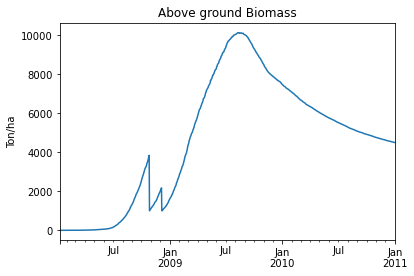

In [9]:
# Save the output
output_1 = dssat.output['PlantGro']
ax = output_1.CWAD.plot()
ax.set_title('Above ground Biomass')
ax.set_ylabel('Ton/ha')

Text(0, 0.5, 'Ton/ha')

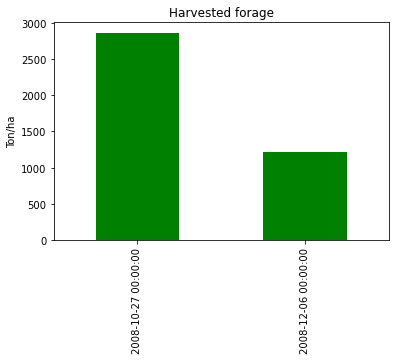

In [10]:
ax = output_1.loc[output_1.HERB > 0, 'HERB'].plot(kind='bar', color='g')
ax.set_title('Harvested forage')
ax.set_ylabel('Ton/ha')

In [11]:
dssat.close()

/tmp/dssatkoykjpix and its content has been removed.
